In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
unsw_train_data = pd.read_csv('/content/UNSW_NB15_training-set.csv')
unsw_test_data = pd.read_csv('/content/UNSW_NB15_testing-set.csv')


In [ ]:
print("Training Data Info:")
print(unsw_train_data.info())
print(unsw_train_data.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  si

In [ ]:
print("Testing Data Info:")
print(unsw_test_data.info())


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-nu

In [ ]:
print(unsw_test_data.head())

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0   

In [ ]:
combined_data = pd.concat([unsw_train_data, unsw_test_data], ignore_index=True)


In [ ]:
# List all categorical columns to encode
categorical_cols = ['proto', 'service', 'state', 'attack_cat']

# Convert categorical columns to numerical values
for col in categorical_cols:
    le = LabelEncoder()
    combined_data[col] = le.fit_transform(combined_data[col])

In [ ]:
# Separate features and target variable in the combined data
X_combined = combined_data.drop('label', axis=1)  # Assuming 'Label' is the target
y_combined = combined_data['label']

In [ ]:
# Normalize features
scaler = StandardScaler()
X_combined = scaler.fit_transform(X_combined)



In [ ]:
# Split X_combined back into separate training and testing sets
# based on original data length
X_train = X_combined[:len(unsw_train_data)]
X_test = X_combined[len(unsw_train_data):]
y_train = y_combined[:len(unsw_train_data)]
y_test = y_combined[len(unsw_train_data):]



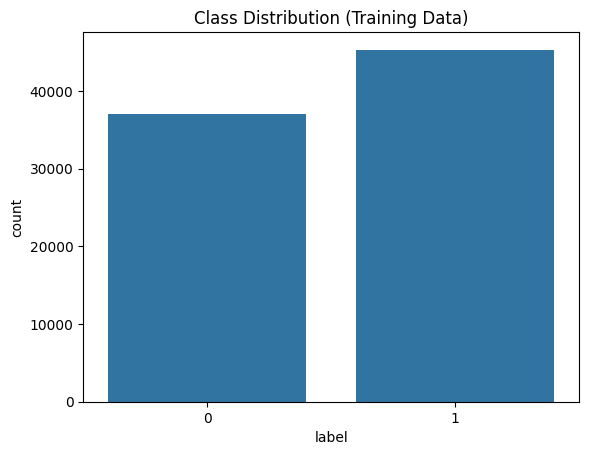

In [ ]:
# Exploratory Data Analysis (EDA) on training data
sns.countplot(x='label', data=unsw_train_data)
plt.title('Class Distribution (Training Data)')
plt.show()

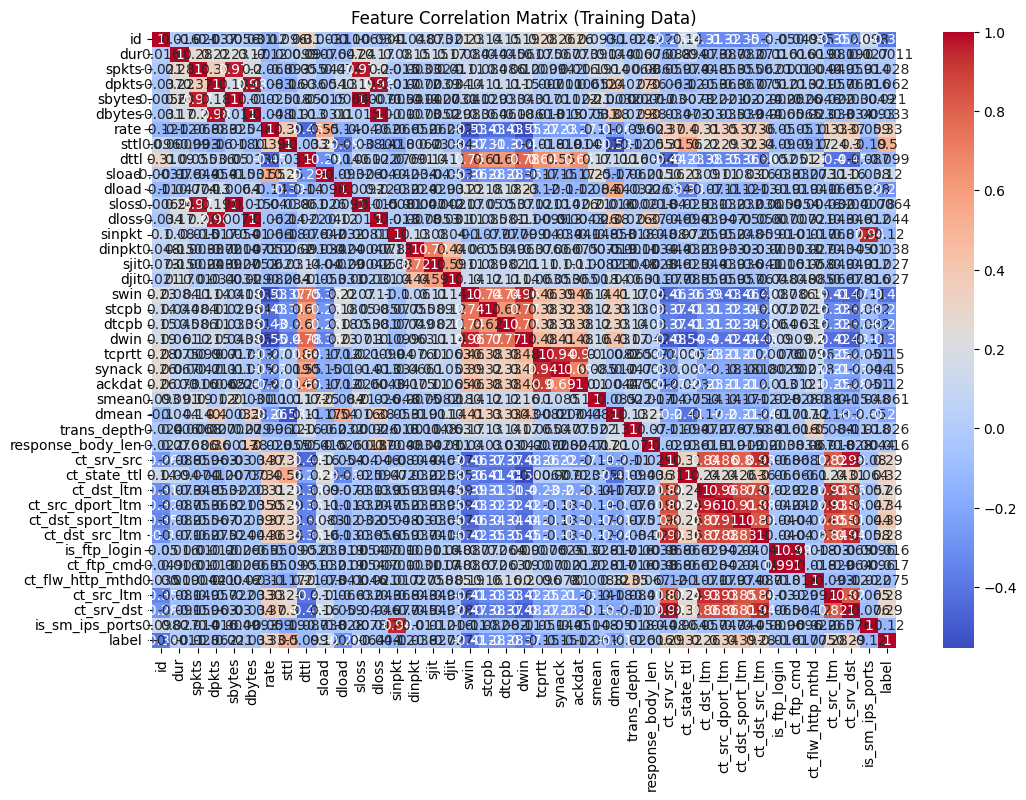

In [ ]:
# Filter only numeric columns for correlation matrix
numeric_data = unsw_train_data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title('Feature Correlation Matrix (Training Data)')
plt.show()


In [ ]:
# Model Development - Multilayer Perceptron (MLP)
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9705 - loss: 0.0859 - val_accuracy: 0.9637 - val_loss: 0.1266
Epoch 2/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9688 - val_loss: 0.1069
Epoch 3/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9999 - loss: 7.6348e-04 - val_accuracy: 0.9562 - val_loss: 0.1566
Epoch 4/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9996 - loss: 0.0042 - val_accuracy: 0.9911 - val_loss: 0.0287
Epoch 5/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 1.0000 - loss: 1.8785e-04 - val_accuracy: 0.9791 - val_loss: 0.0652
Epoch 6/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9474 - val_loss: 0.1679
Epoch 7/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9999 - loss: 7.2379e-05 - val_accuracy: 0.9910 - val_loss: 0.0300
Epoch 8/10
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 1.00

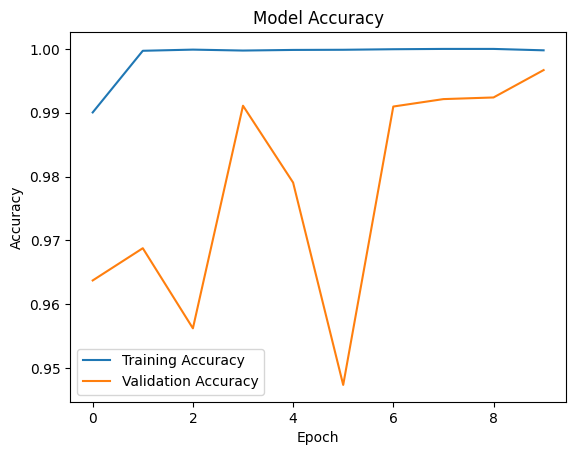

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

5480/5480 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     56000
           1       1.00      1.00      1.00    119341

    accuracy                           1.00    175341
   macro avg       1.00      1.00      1.00    175341
weighted avg       1.00      1.00      1.00    175341

[[ 55870    130]
 [   451 118890]]
